<a href="https://colab.research.google.com/github/KomalMano/Story/blob/master/8_Logistic_Regression_(Multiclass_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits # search this:- digit datasets , 1797 8x8
 #sklearn has predefined or readymate data sets to use to learn machine learning.So this i am using load_datasets
 

In [8]:
digits = load_digits() # now call load_digit method to load my training sets basically


In [10]:
dir(digits) #now i want to explore what this training set contain.Contain couple of thins.


['DESCR', 'data', 'images', 'target', 'target_names']

In [12]:
#now lets print few elements.Now as its return the documentation there are 1797 samples. Now i am just going to print the 1st 1.
digits.data[0]
#its just an array 8*8 images but the image is represented as 1D array.So if u will count these it will be 64 which is 8*8.


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

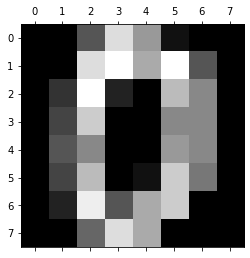

In [15]:
#now if u want to see this particular element then u can use matplotlib.
plt.gray()
plt.matshow(digits.images[0]) # what can do? it will print the corrosponding image.
#so the data has the numeric data and images will have the actual images.
#so u can see that data 0 and image 0. they kind relate to each of others.
#the only difference has to is there is a numeric data and actual image here.


<Figure size 432x288 with 0 Axes>

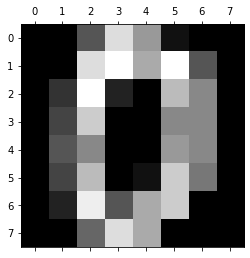

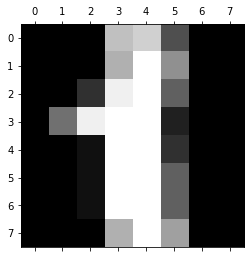

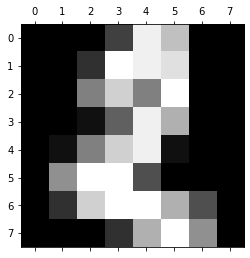

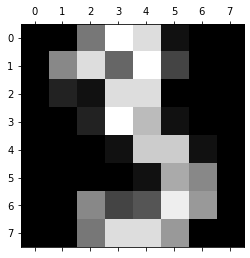

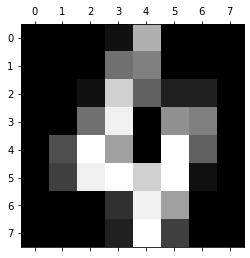

In [17]:
# now if u want to print 1st 5 samples then just print like this .
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])
  #corrosponding numbers will be in this data array
  

In [20]:
  #digits.data[0] use to train our model.
  #before we do that , lets take look at a target and target need.So our target if i print.
digits.target[0:5]
  #so u see that 0 to 5 in literally sequence. the 1st element is 0 1 2 3 4 in images. that we printing here.
  #its saying that this image is zero. last image is 4.
  #So this is our complete training set which has our image as well as target variable. u know say what it is?


array([0, 1, 2, 3, 4])

In [22]:
  #So we can use data and target to train our model.
  #before training our model the usual thing that we do is 
from sklearn.model_selection import train_test_split 


In [23]:
#we try to divide our data set into training and test samples
X_train,X_test,y_train,y_test = train_test_split(digits.data, digits.target,test_size=0.2)
#we dont want to fit our model.we dont model make such that biase it aganst the training data .
#the data to train is different to data to testing . So thats way we split these 2.


In [25]:
len(X_train) # So its roughly 80% all available samples


1437

In [27]:
len(X_test)


360

In [28]:
#Now i have training and spliting data set split. Now create my logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [30]:
model.fit(X_train,y_train)
#means model is get train to x train and y train data set 
#now i again repeat X is hand written caracters and y is out of crossponing output that this 4 number image is 4 .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
#now my model is ready now calculate the score.
model.score(X_test,y_test)
#and X_test is y predicted value and while those compare these y predicted values against the real value which is y test.


0.9666666666666667

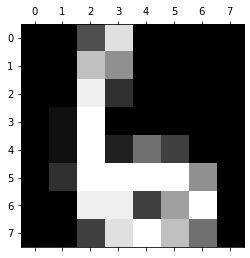

In [37]:
#now to make my actual prediction.
plt.matshow(digits.images[67]) #now i am just pick up random samples.this is prety hard 


In [38]:
#now this number is actually.
digits.target[67] # So ur to the accesss same in ur target

6

In [43]:
#now let see what our model predict. I ma not apply images bcz images are binary data.
#my model likes numeric data more.
#now i m using same index but using data instead of images.
model.predict([digits.data[67]])
# this is the error u get when u are not supplying multi dimenstional array . So i m just going to supply multi dimentional array .
#u can see that it is predicting the trget variable all right.


array([6])

In [46]:
# now i m predicting 0 to 5
model.predict(digits.data[0:5])
#now see my model is doing good

array([0, 1, 2, 3, 4])

In [52]:
#so my score is .96 . How do i know where it do well. Bcz all the samples i trying to doing pretty well.
#So i know where exactly fails? and u know i want get overall feeling of my models accuracy.and 1 of the ways doing that is confusion matrics.
#So i want to show the what the confusion matrics look like this.
#for that i want to need to import matrics.

y_predicted = model.predict(X_test) # when i run that i predicted values run test and i create a confusion matrics 
from sklearn.metrics import confusion_matrix # before i do that i need to predicted values 

cm = confusion_matrix(y_test,y_predicted) # and in the confusion matrics we can supply y test which is the truth and y predicted which is what ur model predicted 
cm # and then confusion matrics back
#when u run back get this 2*2 dimentional array and u r wondering what the hell this is.
#So this is better visulized in matplotlib and seaborn .So that i use the library for the visulization here .


array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  1,  2,  0],
       [ 0,  1,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  1,  0, 36,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  1, 33]])

Text(69.0, 0.5, 'Truth')

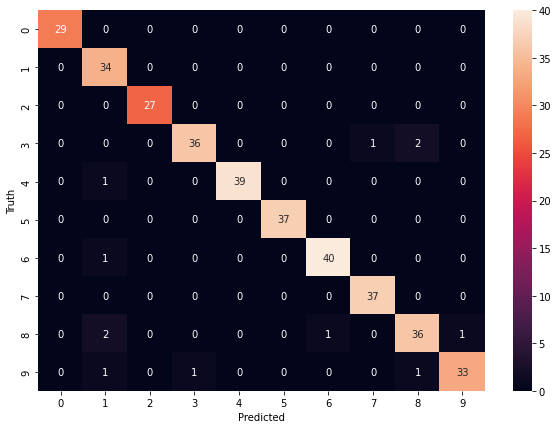

In [54]:
# i am just going copy past the code for confusion matrics visualization . 
#Here i m using seaborn lib which is similarl to mtplotlib which is use for visualization .
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True) #and i m calling here heatmap here with the confusion matrix cm variable that we r created previous
plt.xlabel('Predicted')
plt.ylabel('Truth')
#when u run that this is confusion matrics u got .
#now the way works see here is 37 number . What it means is 37 time the truth was zero and my model it predict to be zero.
#here 2 means in in x_axis:1 and y_axis:8 means 2 times my truth was 8 meaning i feed my model the image of 8 . But my model said no it is 1.Sothese are insatances are not doing good.
#So anywhere in both areas,if u dont see zero means ur model is not working right.
#confusion matrics just a nice way of visualizating how ur model is well doing .